In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
#
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Install fred-api

In [2]:
!pip install fredapi > /dev/null

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'put_your_key_here'

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fred-api")


# 1.Create The Fred Object

In [4]:
fred = Fred(api_key=fred_key)

# 2.Search for economic data

In [5]:
sp_search = fred.search('S&P', order_by='popularity')

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-05-19,2022-05-19,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-05-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-05-19 08:34:03-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-05-19,2022-05-19,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-02-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-04-26 08:04:02-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-05-19,2022-05-19,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-05-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-05-19 08:34:09-05:00,85,This data represents the effective yield of th...
SP500,SP500,2022-05-19,2022-05-19,S&P 500,2012-05-21,2022-05-18,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-05-18 19:10:52-05:00,84,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-05-19,2022-05-19,Real Median Household Income in the United States,1984-01-01,2020-01-01,Annual,A,2020 CPI-U-RS Adjusted Dollars,2020 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2021-09-15 08:45:01-05:00,83,Household data are collected as of March. As ...


# 3. Pull Raw Data

In [7]:
sp500 = fred.get_series(series_id='SP500')

# 4. Plot Raw data

<AxesSubplot:title={'center':'SP500'}>

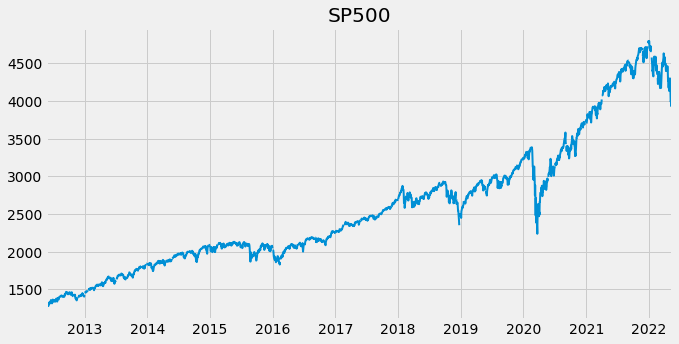

In [8]:
sp500.plot(figsize=(10,5), title='SP500', lw=2)

# 5. Pull and Join Multiple Data Series

In [9]:
unemp_results = fred.search('unemployment')

In [10]:
unrate = fred.get_series('UNRATE')

<AxesSubplot:>

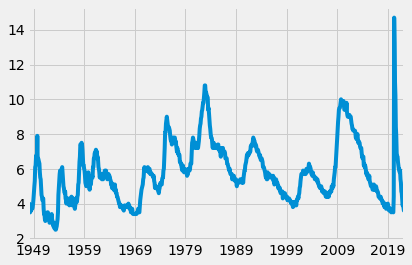

In [11]:
unrate.plot()

In [12]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-05-19,2022-05-19,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-05-19,2022-05-19,Unemployment Rate,1948-01-01,2022-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-05-06 07:43:03-05:00,55,The unemployment rate represents the number of...
NROU,NROU,2022-05-19,2022-05-19,Noncyclical Rate of Unemployment,1949-01-01,2031-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2021-02-01 14:37:05-06:00,70,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-05-19,2022-05-19,Unemployment Level,1948-01-01,2022-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-05-06 07:44:10-05:00,66,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2022-05-19,2022-05-19,Unemployment Rate - Black or African American,1972-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:05-05:00,68,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPIURN,SPIURN,2022-05-19,2022-05-19,"Unemployment Rate in Springfield, MO (MSA)",1990-01-01,2022-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:08:10-05:00,10,None
LNS14000025,LNS14000025,2022-05-19,2022-05-19,"Unemployment Rate - 20 Yrs. & over, Men",1948-01-01,2022-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-06 07:44:52-05:00,10,The series comes from the 'Current Population ...
LRUNTTTTILM156S,LRUNTTTTILM156S,2022-05-19,2022-05-19,Unemployment Rate: Aged 15 and Over: All Perso...,2012-01-01,2022-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-05-12 09:21:09-05:00,9,OECD descriptor ID: LRUNTTTT OECD unit ID: STS...
